# Question Q2

*Question*: Based on your experience, what activities do you consider to be most difficult when defining requirements for ML-enabled systems?

*Answer Type*: Multiple Single Option

*Options*: [Very Easy, Easy, Neutral, Complex, Very Complex, I don't know]

### Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
ml_stages = {
    'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding': 'Problem Understanding',
    'Q2_ML_Life_Cycle_Difficulty_Data_Collection': 'Data Collection',
    'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing': 'Data Pre-Processing',
    'Q2_ML_Life_Cycle_Difficulty_Model_Creation': 'Model Creation',
    'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation': 'Model Evaluation',
    'Q2_ML_Life_Cycle_Difficulty_Model_Deployment': 'Model Deployment',
    'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring': 'Model Monitoring'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', 'Q2_ML_Life_Cycle_Difficulty_Data_Collection',
'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', 'Q2_ML_Life_Cycle_Difficulty_Model_Creation',
'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', 'Q2_ML_Life_Cycle_Difficulty_Model_Deployment',
'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring']].head(20)

,Q2_ML_Life_Cycle_Difficulty_Problem_Understanding,Q2_ML_Life_Cycle_Difficulty_Data_Collection,Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing,Q2_ML_Life_Cycle_Difficulty_Model_Creation,Q2_ML_Life_Cycle_Difficulty_Model_Evaluation,Q2_ML_Life_Cycle_Difficulty_Model_Deployment,Q2_ML_Life_Cycle_Difficulty_Model_Monitoring
0,0,0,0,0,0,0,0
1,Complex,Complex,Very Complex,Very Complex,Complex,Very Complex,Neutral
2,Complex,Very Complex,Complex,Complex,Neutral,Neutral,Complex
3,Complex,Easy,Easy,Neutral,Complex,Very Complex,Easy
4,Neutral,Neutral,Complex,Complex,Very Complex,Very Complex,Neutral
5,Neutral,Complex,Complex,Complex,Complex,Complex,Neutral
6,0,0,0,0,0,0,0
7,Very Complex,Neutral,Complex,Easy,Very Complex,Complex,Complex
8,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0


In [6]:
# cleaning data in all Q2 columns

# replace two 'not checked' values (0 and -77) to "I don't know" value

dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Data_Collection', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Creation', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Deployment', ["0", "-77"], "I don't know", "eq")
dataframe_obj.replace_list_values_by_condition(
    'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring', ["0", "-77"], "I don't know", "eq")

In [7]:
# each ML stage has a different distribution of answers
data_plot_df = {"Very Complex": [],
                "Complex": [],
                "Neutral": [],
                "Easy": [],
                "Very Easy": [],
                # "I don't know": []
               }
index_plot_df = []

for ml_stage in ml_stages:
    # barplot data
    index_plot_df.append(ml_stages[ml_stage])
    for dpd in data_plot_df:
        total_count = dataframe_obj.df[ml_stage].value_counts().get(dpd)
        data_plot_df[dpd].append(total_count if total_count else 0)

# plot object
q2_plot = PlotUtils(pd.DataFrame(
    data=data_plot_df, index=index_plot_df
).sort_values(by=['Very Complex'], ascending=True))
# turn into percentage the values in each row
#q2_plot.df = q2_plot.df.div(q2_plot.df.sum(axis=1), axis=0).mul(100).round(2)
                           

In [8]:
q2_plot.df.sum(axis=1)

Model Monitoring         168
Model Creation           173
Model Evaluation         171
Model Deployment         170
Data Pre-Processing      172
Data Collection          172
Problem Understanding    172
dtype: int64

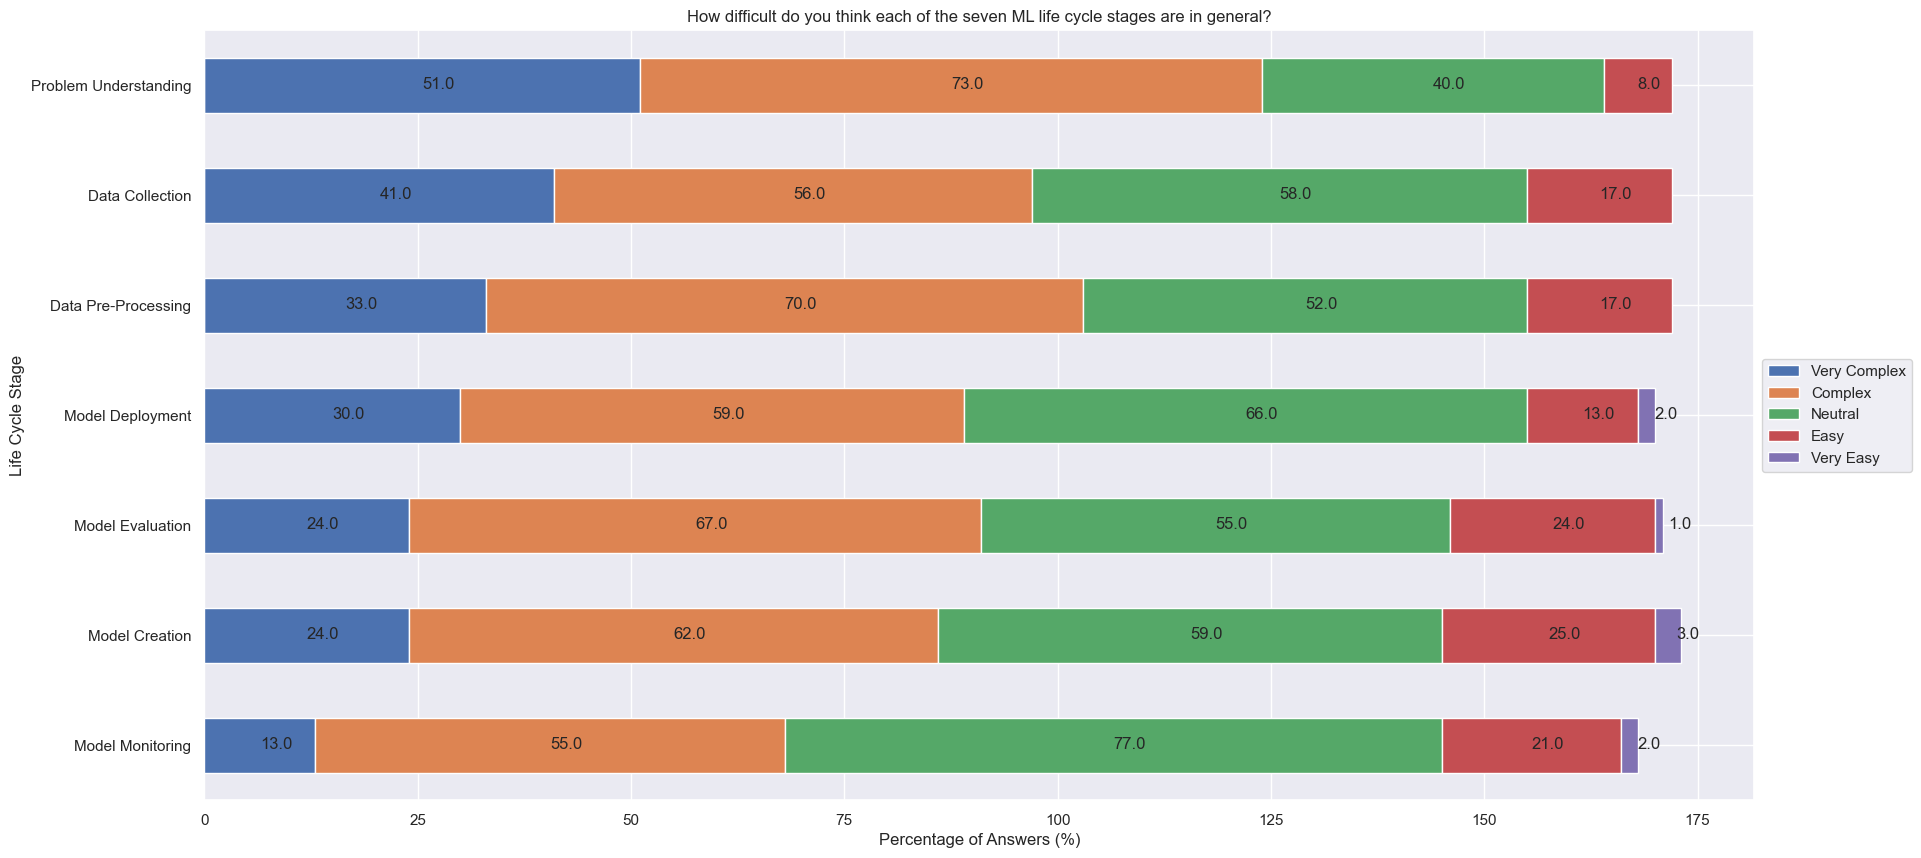

In [9]:
import matplotlib.pyplot as plt
# expected df: https://stackoverflow.com/a/60895640

ax = q2_plot.df.plot(kind='barh', stacked=True, figsize=(20, 10), rot=0, 
                     xlabel='Percentage of Answers (%)', ylabel='Life Cycle Stage', title="How difficult do you think each of the seven ML life cycle stages are in general?")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
total_containers = len(ax.containers) - 1
idx_containers = 0
for c in ax.containers:
    for rect in c:
        width = rect.get_width()
        if width > 0:
            x = rect.get_x() + width / 2 # Posição horizontal do rótulo
            if width < 7:
                if idx_containers == total_containers:
                    x = x + 1
                else:
                    x = x - 1
            y = rect.get_y() + rect.get_height() / 2 # Posição vertical do rótulo
            label = f'{round(width, 2)}'  # Texto do rótulo
            ax.annotate(label, (x, y), xytext=(0, -2.5) if width > 7 or idx_containers == total_containers else (0, 22), textcoords="offset points")
    idx_containers += 1


### Bootstrapping Analysis

In [10]:
# each ML stage has a different distribution of answers in bootstrapping
index_plot_df = []
# plot object for bootstrapped data
data_plot_df = {"Very Complex": [],
                "Complex": [],
                "Neutral": [],
                "Easy": [],
                "Very Easy": [],
                # "I don't know": []
               }

for ml_stage in ml_stages:
    valid_options_list = list(dataframe_obj.df[ml_stage].unique())
    valid_answers_list = list(dataframe_obj.df[ml_stage])
    
    replacements = 1000
    population_sample_size = len(dataframe_obj.df[ml_stage]) # equals n - total valid answers

    bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)
    
    bootstrapped_dict_data = bootstrapping_obj.bootstrapping("single")
    
    # get a pair of values between dict key and all the list values inside that key 
    # key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
    indexes = []
    values = []
    for idx in bootstrapped_dict_data:
        indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
        values += bootstrapped_dict_data[idx]['population']
    
    # barplot data
    index_plot_df.append(ml_stages[ml_stage])
    for dpd in data_plot_df:
        # take the mean of each relevance for this ml stage
        mean_relevance_list = []
        for idx, val in zip(indexes, values):    
            if idx == dpd:
                mean_relevance_list.append(val)
    
        total_count = np.mean(mean_relevance_list)
        data_plot_df[dpd].append(total_count if total_count else 0)
        
    # confidence for each option
    print(ml_stages[ml_stage] + " Option: (Lower Value, Mean, Upper Value)")
    for idx in bootstrapped_dict_data:
        print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

    
    print(20*"---")

# plot object
q2_boot_plot = PlotUtils(pd.DataFrame(
    data=data_plot_df, index=index_plot_df
).sort_values(by=['Very Complex'], ascending=True))
# turn into percentage the values in each row
q2_boot_plot.df = q2_boot_plot.df.div(q2_boot_plot.df.sum(axis=1), axis=0).mul(100).round(2)

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Problem Understanding Option: (Lower Value, Mean, Upper Value)
I don't know:: P = 8.545 [8.426, 8.664]
Complex:: P = 38.677 [38.461, 38.893]
Neutral:: P = 21.373 [21.194, 21.553]
Very Complex:: P = 27.177 [26.981, 27.372]
Easy:: P = 4.228 [4.137, 4.319]
------------------------------------------------------------
Data Collection Option: (Lower Value, Mean, Upper Value)
I don't know:: P = 8.524 [8.401, 8.647]
Complex:: P = 29.703 [29.494, 29.912]
Very Complex:: P = 21.948 [21.757, 22.14]
Easy:: P = 9.115 [8.978, 9.252]
Neutral:: P = 30.709 [30.51, 30.907]
------------------------------------------------------------
Data Pre-Processing Option: (Lower Value, Mean, Upper Value)
I don't know:: P = 8.574 [8.437, 8.711]
Very Complex:: P = 17.496 [17.31, 17.682]
Complex:: P = 37.208 [36.982, 37.434]
Easy:: P = 9.047 [8.92, 9.174]
Neutral:: P = 27.676 [27.471, 27.88]
------------------------------------------------------------
Model Creation Option: (Lower Value, Mean, Upper Value)
I don't know

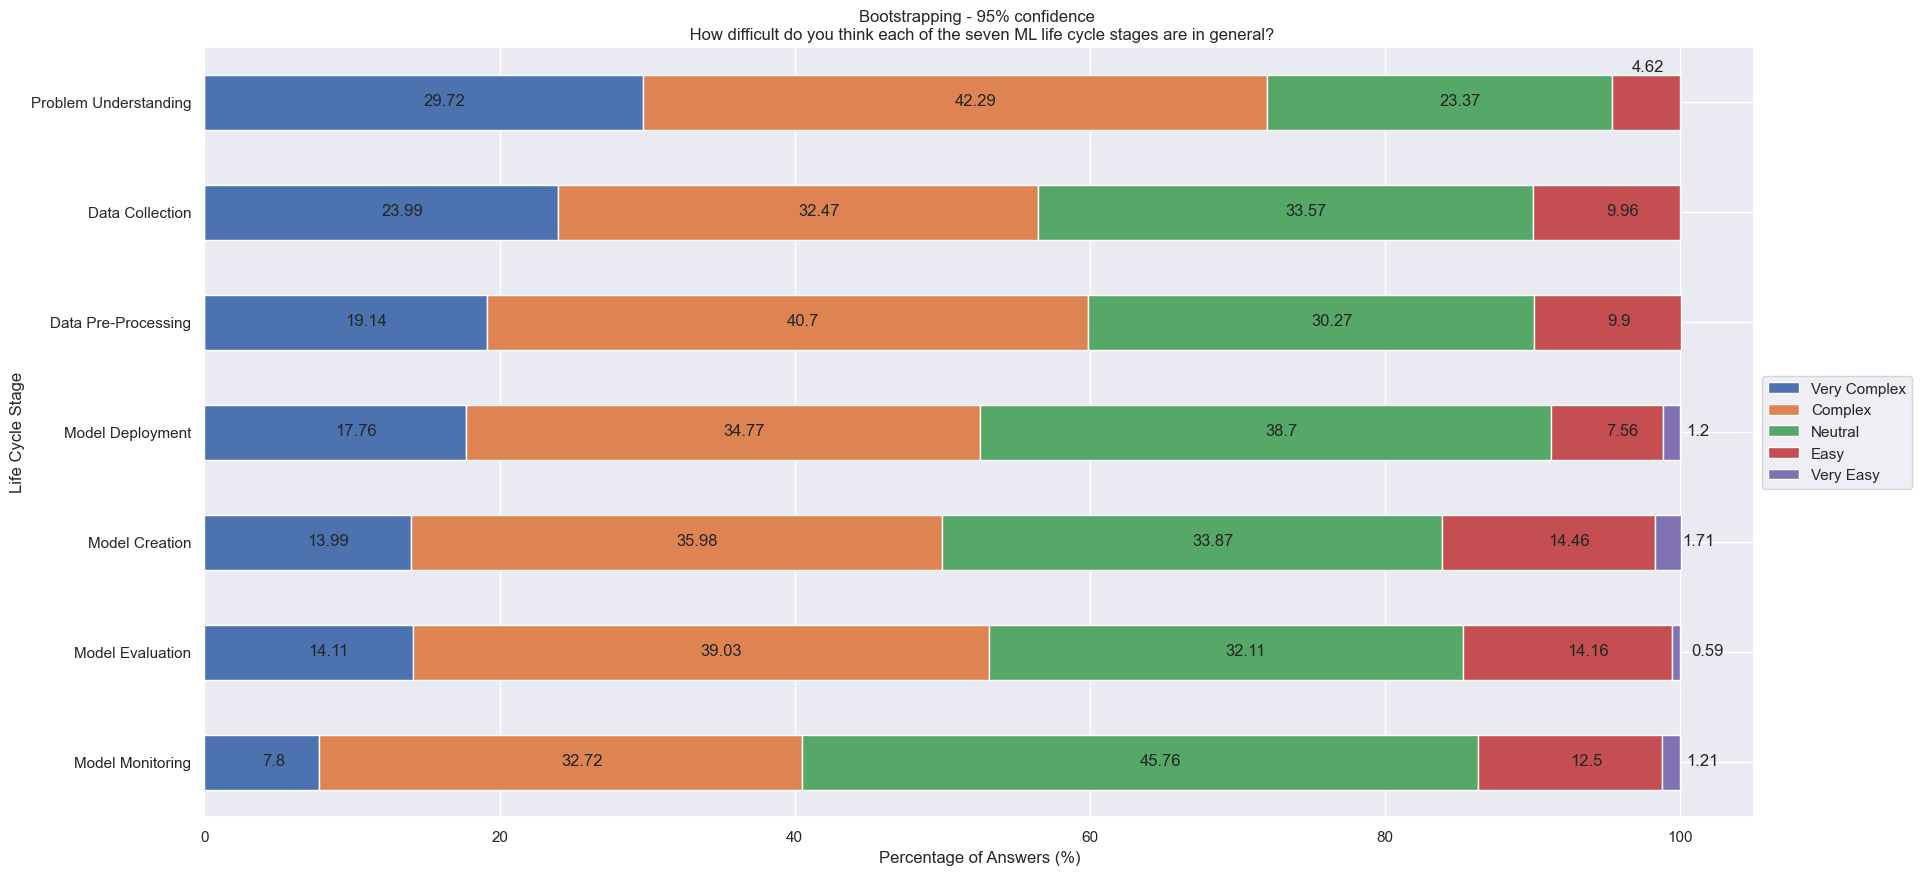

In [11]:
import matplotlib.pyplot as plt
# expected df: https://stackoverflow.com/a/60895640

ax = q2_boot_plot.df.plot(kind='barh', stacked=True, figsize=(20, 10), rot=0, 
                     xlabel='Percentage of Answers (%)', ylabel='Life Cycle Stage', title="Bootstrapping - 95% confidence \n How difficult do you think each of the seven ML life cycle stages are in general?")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
total_containers = len(ax.containers) - 1
idx_containers = 0
for c in ax.containers:
    for rect in c:
        width = rect.get_width()
        if width > 0:
            x = rect.get_x() + width / 2 # Posição horizontal do rótulo
            if width < 7:
                if idx_containers == total_containers:
                    x = x + 1
                else:
                    x = x - 1
            y = rect.get_y() + rect.get_height() / 2 # Posição vertical do rótulo
            label = f'{round(width, 2)}'  # Texto do rótulo
            ax.annotate(label, (x, y), xytext=(0, -2.5) if width > 7 or idx_containers == total_containers else (0, 22), textcoords="offset points")
    idx_containers += 1